# Introduction to Regression with Neural Netowrks in TensorFlow

There are many definitions for a regression problem but  in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter ... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.9.0


## Creating data to view and fit

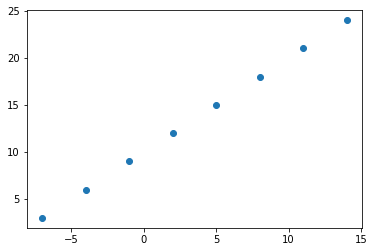

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y);

In [3]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
X[1], y[1]

(-4.0, 6.0)

In [6]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [9]:
X[0].ndim

0

In [10]:
X[0], y[0]

(-7.0, 3.0)

In [11]:
input_shape = X[0].shape
input_shape

()

In [13]:
# Turn or NumPy array into tensors
X = tf.constant(X)
y = tf.constant(y)

X.shape, y.shape

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequencial API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.MAE,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 685ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [15]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
# Try and make a predicition using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 76ms/step


array([[12.716021]], dtype=float32)

In [19]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [22]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 432ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 8m

1/1 [==============================] - 0s 6ms/step - loss: 6.9544 - mae: 6.9544
Epoch 89/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9488 - mae: 6.9488
Epoch 90/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9431 - mae: 6.9431
Epoch 91/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9375 - mae: 6.9375
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9319 - mae: 6.9319
Epoch 93/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9263 - mae: 6.9263
Epoch 94/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9206 - mae: 6.9206
Epoch 95/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9150 - mae: 6.9150
Epoch 96/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9094 - mae: 6.9094
Epoch 97/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9038 - mae: 6.9038
Epoch 98/100
1/1 [==============================] - 0s 5ms/step - loss: 6.8981 - ma

In [23]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [24]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 102ms/step


array([[29.739855]], dtype=float32)

In [27]:
# Rebuild again the model

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             metrics=["mae"])

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 408ms/step - loss: 10.5874 - mae: 10.5874
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5869 - mae: 10.5869
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5865 - mae: 10.5865
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5860 - mae: 10.5860
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5856 - mae: 10.5856
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5851 - mae: 10.5851
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5847 - mae: 10.5847
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5842 - mae: 10.5842
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5838 - mae: 10.5838
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5833 - mae: 10.5833
Epoch 11/100
1/1 [==============================] - 0s 6m

1/1 [==============================] - 0s 5ms/step - loss: 10.5487 - mae: 10.5487
Epoch 88/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5482 - mae: 10.5482
Epoch 89/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5478 - mae: 10.5478
Epoch 90/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5473 - mae: 10.5473
Epoch 91/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5469 - mae: 10.5469
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5464 - mae: 10.5464
Epoch 93/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5460 - mae: 10.5460
Epoch 94/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5455 - mae: 10.5455
Epoch 95/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5451 - mae: 10.5451
Epoch 96/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5446 - mae: 10.5446
Epoch 97/100
1/1 [==============================] - 0s 7ms/step

In [28]:
model.predict([17.0])

1/1 [==============================] - 0s 89ms/step


array([[14.327156]], dtype=float32)

In [38]:
# Rebuild again by adding anotehr hidden layer, with 100 hidden units

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=["mae"])

# 3. Fiting the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.3469 - mae: 12.3469
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.6170 - mae: 11.6170
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8837 - mae: 10.8837
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1465 - mae: 10.1465
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 9.4040 - mae: 9.4040
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 8.6532 - mae: 8.6532
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 7.8904 - mae: 7.8904
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 7.1120 - mae: 7.1120
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 6.8174 - mae: 6.8174
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 7.1412 - mae: 7.1412
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 

1/1 [==============================] - 0s 11ms/step - loss: 0.1130 - mae: 0.1130
Epoch 89/100
1/1 [==============================] - 0s 11ms/step - loss: 0.1426 - mae: 0.1426
Epoch 90/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1916 - mae: 0.1916
Epoch 91/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1534 - mae: 0.1534
Epoch 92/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1144 - mae: 0.1144
Epoch 93/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0577 - mae: 0.0577
Epoch 94/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1123 - mae: 0.1123
Epoch 95/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1674 - mae: 0.1674
Epoch 96/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1911 - mae: 0.1911
Epoch 97/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1582 - mae: 0.1582
Epoch 98/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1128 - 

In [39]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 142ms/step


array([[26.209175]], dtype=float32)

## Evaluting the model

In practice, a typical workflow you'l go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

When it comes to evaluation ... there are 3 words you should memorize:
    
    "Visualize, visualize, visualize"
    
It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predicitions of the model - how do the predictions of a model line up against the ground truth (the original labels)?


In [41]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [43]:
# Make labes for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

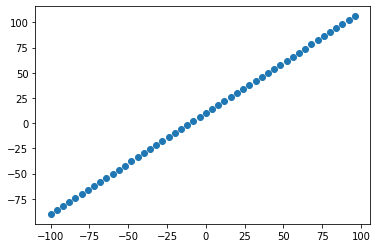

In [45]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 sets ...